In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [5]:
data.dropna(inplace = True)

In [7]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [8]:
split1 = int(len(data) * .6)
split2 = int(len(data) * .9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [9]:
## data_in.iloc[0:10,1:3]

,Unemployment,HousingStarts
1959-01-01,6.0,1657.0
1959-02-01,5.9,1667.0
1959-03-01,5.6,1620.0
1959-04-01,5.2,1590.0
1959-05-01,5.1,1498.0
1959-06-01,5.0,1503.0
1959-07-01,5.1,1547.0
1959-08-01,5.2,1430.0
1959-09-01,5.5,1540.0
1959-10-01,5.7,1355.0


In [10]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [11]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [12]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [13]:
import matplotlib.pyplot as plt

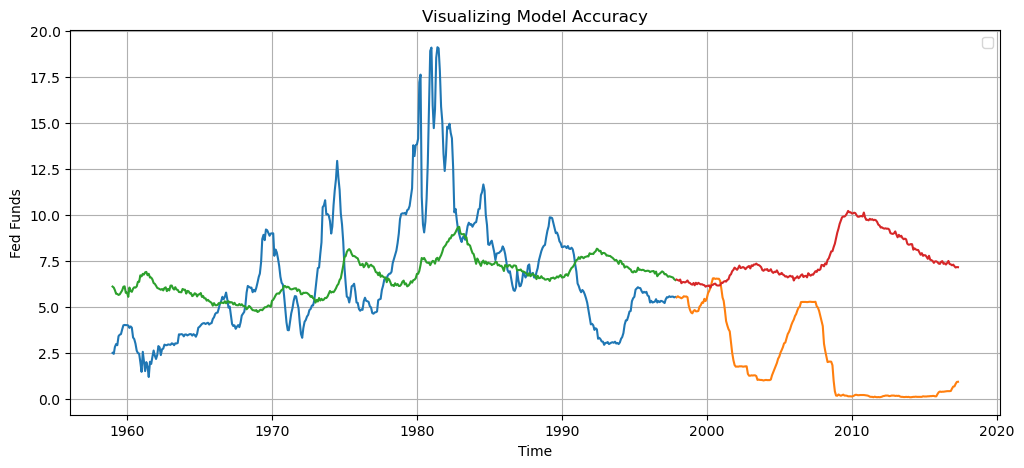

In [19]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

It is quite bit underfitting and the fit stops. The model is more overfitting, typically, the insample will go down and out sample goes up.

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
in_mse_1 = mean_squared_error( y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error( y_out, model1.predict(X_out))

In [22]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566723


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
max_degrees=3

DEGREES :  1


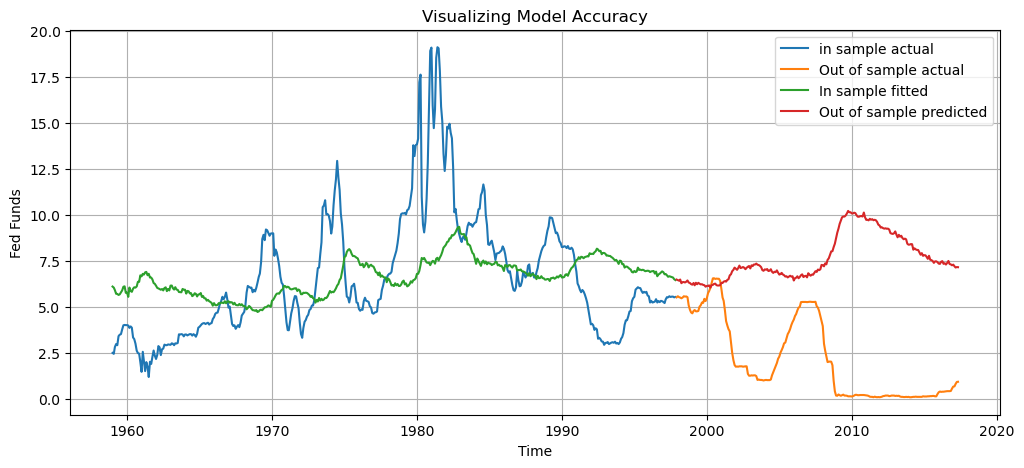

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566789
______________________________________
______________________________________
DEGREES :  2


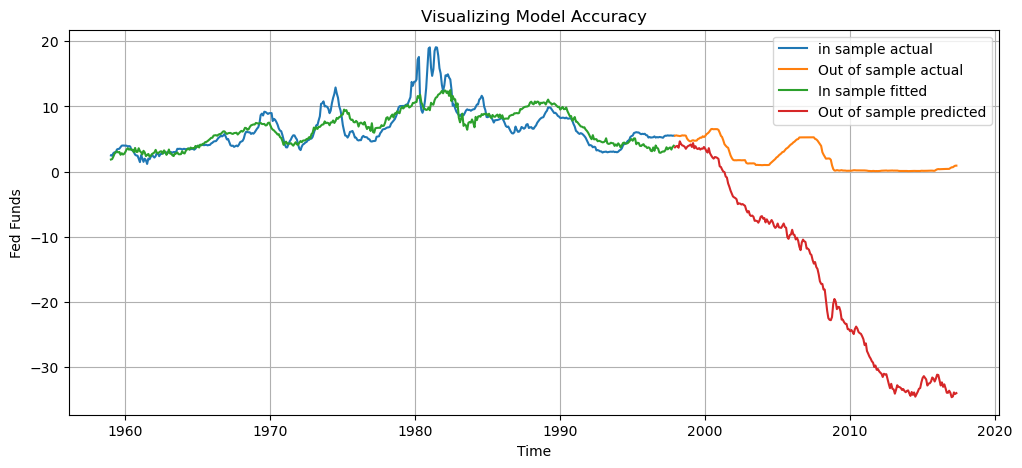

Insample MSE :  3.8634771392760694
Outsample MSE :  481.4465099288575
______________________________________
______________________________________
DEGREES :  3


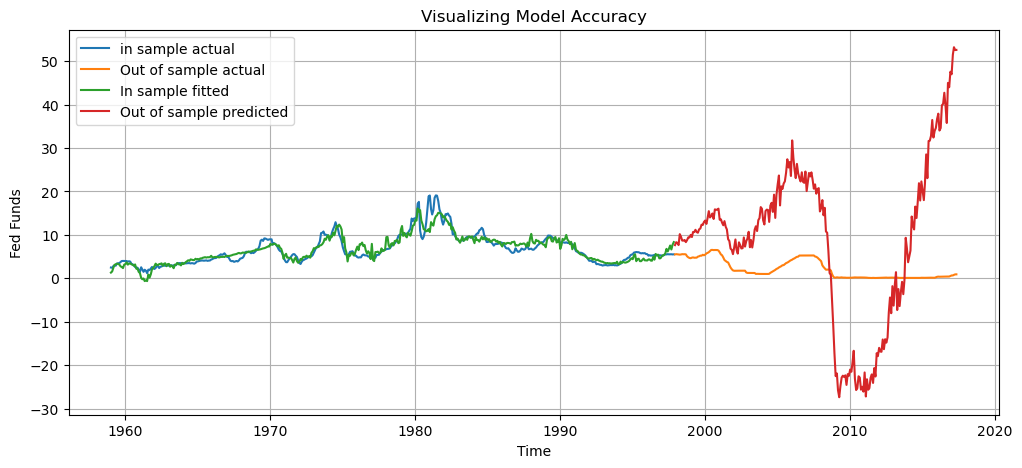

Insample MSE :  1.8723636270283275
Outsample MSE :  371.7676706654165
______________________________________
______________________________________


In [31]:
for degrees in range(1,1+max_degrees):
    print("DEGREES : ", degrees)
    ##(X1,X2)with PF(=2) transform to (X1^2,X1X2, X2^2)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    #Q3.)
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    #Q4.)
    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)

    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["in sample actual", "Out of sample actual", "In sample fitted", "Out of sample predicted"])
    plt.grid()
    plt.show()
    
    #Q5.)
    in_mse_1 = mean_squared_error( y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error( y_out, model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print("______________________________________")
    print("______________________________________")

# 7.) State your observations :

The model when the degree equals to 1 is overfitting. We could observe that the insample MSE is decreasing while the out of sample MSE is increasing and then decreasing. 